# Project 2: Titanic Survival Analysis
**Name:** Brandon
**Date:** 2025-11-02

Applying the supervised learning workflow to the Titanic dataset using pandas, seaborn, and scikit-learn.

## 0. Imports

In [4]:
# --- Section 0: Imports ---

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

# Optional: show all columns and use a clean theme
pd.set_option('display.max_columns', None)
sns.set_theme(style='whitegrid')

## 1. Import and Inspect the Data

In [5]:
# --- Section 1: Import and Inspect the Data (Offline Safe Version) ---

# Try to load Titanic from seaborn; if SSL fails, load from local CSV instead.
try:
    titanic = sns.load_dataset("titanic")
    print("✅ Loaded Titanic dataset from seaborn.")
except Exception as e:
    print("⚠️ Could not load from seaborn, using local CSV instead...")
    titanic = pd.read_csv("titanic.csv")

# 1. Basic shape
print("\nShape:", titanic.shape)

# 2. Column names
print("\nColumns:")
print(titanic.columns.tolist())

# 3. Info (types, non-null counts)
print("\n--- Dataset Info ---")
titanic.info()

# 4. First 10 rows
print("\n--- First 10 Rows ---")
print(titanic.head(10))

# 5. Missing values
print("\n--- Missing Values ---")
print(titanic.isnull().sum())

# 6. Summary statistics
print("\n--- Summary Statistics ---")
print(titanic.describe())

# 7. Correlation matrix
print("\n--- Correlations (numeric only) ---")
print(titanic.corr(numeric_only=True))

⚠️ Could not load from seaborn, using local CSV instead...

Shape: (891, 15)

Columns:
['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive

## 2. Data Exploration and Preparation

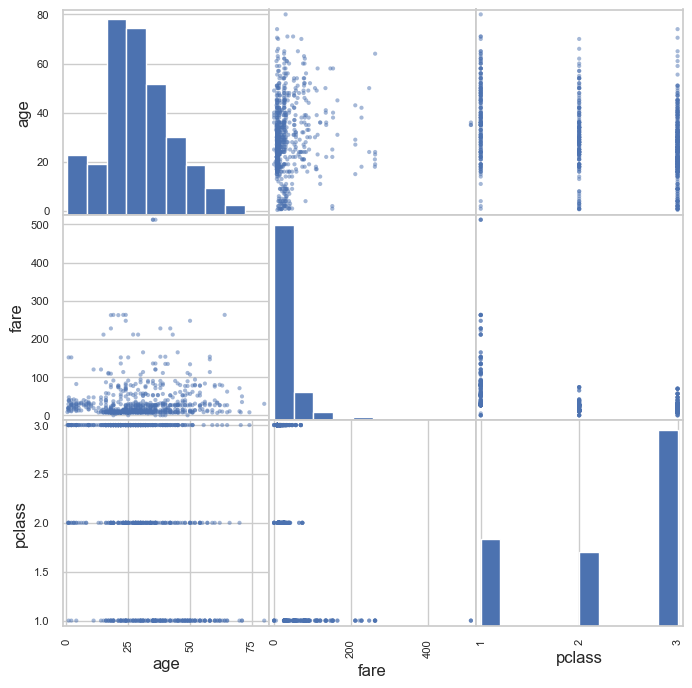

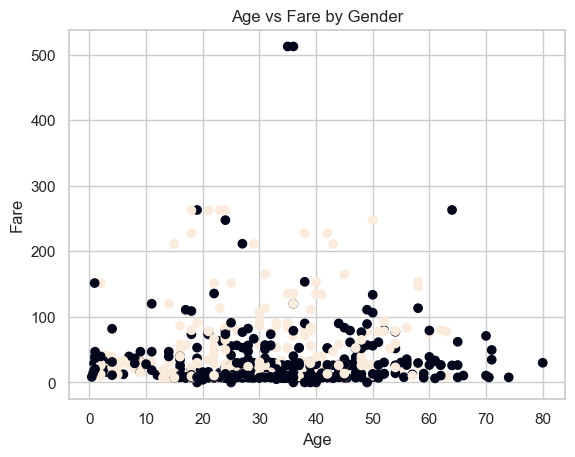

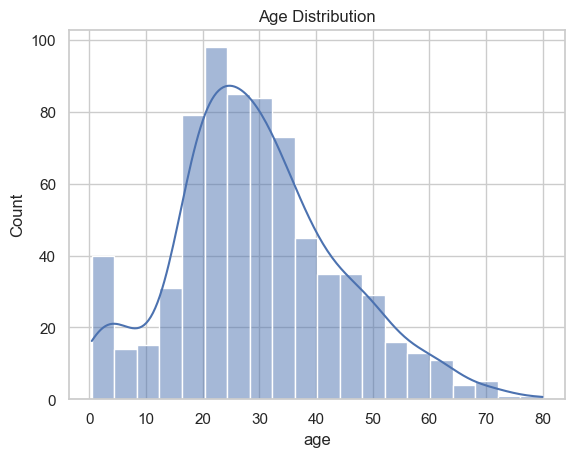

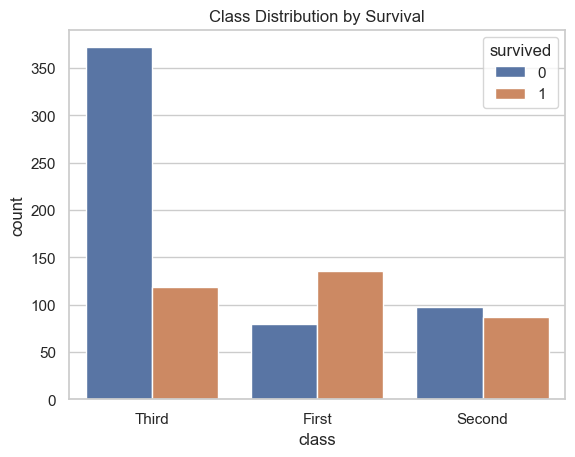

In [6]:
numeric_attrs = ['age', 'fare', 'pclass']
scatter_matrix(titanic[numeric_attrs], figsize=(8, 8))
plt.show()

plt.scatter(
    titanic['age'], titanic['fare'], c=titanic['sex'].apply(lambda x: 0 if x == 'male' else 1)
)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare by Gender')
plt.show()

sns.histplot(titanic['age'], kde=True)
plt.title('Age Distribution')
plt.show()

sns.countplot(x='class', hue='survived', data=titanic)
plt.title('Class Distribution by Survival')
plt.show()

In [9]:
titanic['age'] = titanic['age'].fillna(titanic['age'].median())
titanic['embark_town'] = titanic['embark_town'].fillna(titanic['embark_town'].mode()[0])
titanic['embarked'] = titanic['embarked'].fillna(titanic['embarked'].mode()[0])
titanic = titanic.drop(columns=['deck'], errors='ignore')

In [10]:
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})
titanic['alone'] = titanic['alone'].astype(int)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size
0,0,3,0,22.0,1,0,7.2500,2,Third,man,True,Southampton,no,0,2
1,1,1,1,38.0,1,0,71.2833,0,First,woman,False,Cherbourg,yes,0,2
2,1,3,1,26.0,0,0,7.9250,2,Third,woman,False,Southampton,yes,1,1
3,1,1,1,35.0,1,0,53.1000,2,First,woman,False,Southampton,yes,0,2
4,0,3,0,35.0,0,0,8.0500,2,Third,man,True,Southampton,no,1,1


## 3. Feature Selection and Justification

In [11]:
X = titanic[['age', 'fare', 'pclass', 'sex', 'family_size']]
y = titanic['survived']
print('Features:', X.columns.tolist())
print('Target: survived')

Features: ['age', 'fare', 'pclass', 'sex', 'family_size']
Target: survived


## 4. Train/Test Splitting

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print('Simple Split - Train size:', len(X_train), ' Test size:', len(X_test))

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx, test_idx in splitter.split(X, y):
    X_train_strat = X.iloc[train_idx]
    X_test_strat = X.iloc[test_idx]
    y_train_strat = y.iloc[train_idx]
    y_test_strat = y.iloc[test_idx]

print('Stratified Split - Train size:', len(X_train_strat), ' Test size:', len(X_test_strat))
print('Original class distribution:\n', y.value_counts(normalize=True))
print('Stratified train distribution:\n', y_train_strat.value_counts(normalize=True))
print('Stratified test distribution:\n', y_test_strat.value_counts(normalize=True))

Simple Split - Train size: 712  Test size: 179
Stratified Split - Train size: 712  Test size: 179
Original class distribution:
 survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64
Stratified train distribution:
 survived
0    0.616573
1    0.383427
Name: proportion, dtype: float64
Stratified test distribution:
 survived
0    0.614525
1    0.385475
Name: proportion, dtype: float64


## 5. (Optional Bonus) Try Another Dataset